# **Emotion detection using CNN**


>**Problem Statement**<br>
The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).<br>
<br>
**Dataset Description**
- **Total Images**: The dataset consists of 28,709 examples 
<br>
- Fer2013.csv  contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. 
- Classes: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral 

![alt text](https://i.imgur.com/lGvw0Bq.png)
 


>**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook(similar to this one) using convolutional neural network for classifing the images from [Fer.csv](https://www.kaggle.com/deadskull7/fer2013) with best accuracy
- Prepare the dataset for the model
- Reshape and Normalize the data:
<br>
<b>Hint:</b><br>
•	Split pixels by space to get columns 
•	reshape the input image (48,  48 ,1)<br>
•	change the type of data to float32

- Normalize & Train_Test Split 
<br>
<b>Hint:</b><br>
•	Normalize the data by dividing with 255<br>
•	Split data into train and test (90,10)

<b> Define CNN Model: </b>
- •	Layer 1<br>
•	2 Conv2d with 64 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu <br>
- •	Layer 2<br>
•	2 Conv2d with 128 filters of 5,5 filter <br>
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 3<br>
•	2 Conv2d with 256 filters of 3,3 filter<br> 
•	BatchNormalization layer<br>
•	Max Pooling layer with 2,2 <br>
•	Activation relu<br>
- •	Layer 4<br>
•	Flatten layer <br>
•	Dense Layer with 128 Neuron <br>
•	BatchNormalization<br> 
•	Activation Relu <br>
•	Dropout 0.25 <br>
•	Dense 7 neurons with Softmax <br>
•	Loss: Categorical cross-entropy <br>
•	Optimizer: Adam <br>


**Answer:** What parameters should be choosen to get best accuracy on classifying the images into various categories?

# **Loading the data**

In [1]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = "1IwsWiLrfuUKpFXqzmgk1BZLrUhq3WeuB"


In [3]:
import numpy as np
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')

In [4]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [5]:
num_classes = 7
width = 48
height = 48
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

In [6]:
from math import sqrt
depth = 1
height = int(sqrt(len(df.pixels[0].split()))) 
width = int(height)
print(depth,height,width)

1 48 48


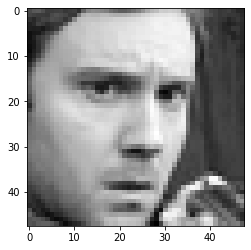

Angry


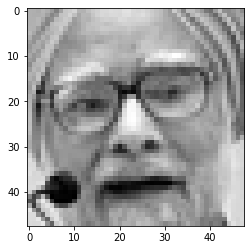

Angry


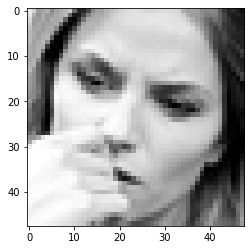

Fear


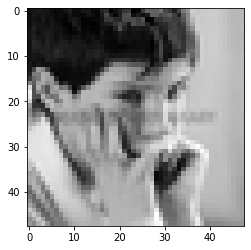

Sad


In [12]:
X = np.zeros((df["pixels"].shape[0], 48*48))

for ix in range(X.shape[0]):
    p = df["pixels"][ix].split(' ')
    for iy in range(X.shape[1]):
        X[ix, iy] = int(p[iy])

from matplotlib import pyplot as plt
%matplotlib inline

for ix in range(4):
    plt.figure(ix)
    plt.imshow(X[ix].reshape((48, 48)), interpolation='none', cmap='gray')
    plt.show()
    print(emotion_labels[df["emotion"][ix]]) 


In [13]:
df["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [14]:
train_set = df[(df["Usage"] == 'Training')] 
val_set = df[(df["Usage"] == 'PublicTest')]
test_set = df[(df["Usage"] == 'PrivateTest')] 

X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [15]:
Y_train = train_set["emotion"]
Y_val =   val_set["emotion"]
Y_test =  test_set["emotion"]

from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 7)
Y_val =  np_utils.to_categorical(Y_val, 7)
Y_test = np_utils.to_categorical(Y_test, 7)

Using TensorFlow backend.


In [16]:
print(X_train.shape,Y_train.shape)
print(X_val.shape,Y_val.shape)
print(X_test.shape,Y_test.shape)

(28709, 48, 48, 1) (28709, 7)
(3589, 48, 48, 1) (3589, 7)
(3589, 48, 48, 1) (3589, 7)


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator( 
    rescale=1./255
    )
datagen.fit(X_train)


In [18]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=2, 
                                            verbose=2, 
                                            factor=0.5, 
                                            min_lr=0.00008)

callbacks = [earlystop, learning_rate_reduction]

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization


model = Sequential()

#Layer1
model.add(Conv2D(64,(5,5),input_shape=(48,48,1)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


#Layer2
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#Layer3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


#Layer 4
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(7, activation='softmax'))



In [25]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(optimizer= opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 128)      

In [26]:
batch_size = 128
num_epochs = 200 

train_flow = datagen.flow(X_train, Y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, Y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, Y_test, batch_size=batch_size) 

In [27]:
# we iterate 200 times over the entire training set 
training = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    callbacks=callbacks,
                    validation_data=val_flow,  
                    validation_steps=len(X_val) / batch_size) 

Epoch 1/200
225/224 [==============================] - 28s 123ms/step - loss: 0.7670 - accuracy: 0.7156 - val_loss: 1.4448 - val_accuracy: 0.6381
Epoch 2/200
225/224 [==============================] - 26s 115ms/step - loss: 0.7565 - accuracy: 0.7217 - val_loss: 0.1502 - val_accuracy: 0.6278
Epoch 3/200
225/224 [==============================] - 26s 115ms/step - loss: 0.7514 - accuracy: 0.7224 - val_loss: 1.1265 - val_accuracy: 0.6250
Epoch 4/200
225/224 [==============================] - 26s 115ms/step - loss: 0.7391 - accuracy: 0.7269 - val_loss: 0.7889 - val_accuracy: 0.6121

Epoch 00004: ReduceLROnPlateau reducing learning rate to 8e-05.
Epoch 5/200
225/224 [==============================] - 26s 115ms/step - loss: 0.7269 - accuracy: 0.7300 - val_loss: 0.6483 - val_accuracy: 0.6289
Epoch 6/200
225/224 [==============================] - 26s 115ms/step - loss: 0.7209 - accuracy: 0.7336 - val_loss: 1.0871 - val_accuracy: 0.6278
Epoch 7/200
225/224 [==============================] - 26s 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


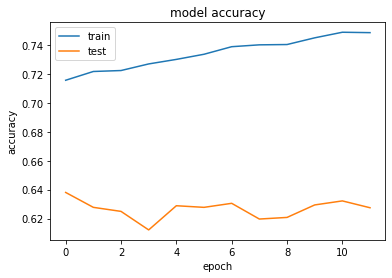

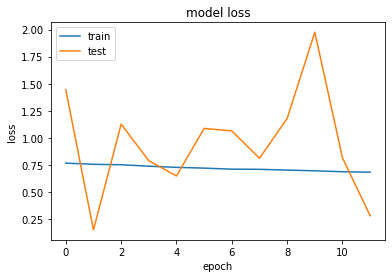

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())

# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
loss = model.evaluate_generator(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

Test Loss 0.4568061828613281
Test Acc: 0.6597937941551208


# **Answer**

**What parameters should be choosen to get best accuracy on classifying the images into various categories?**

*the parameters that i chose initially are batch_size=64, epochs=200 along with the generic parameters in callback functions.
On training the model, we found that the training stopped at 30 epochs, with a test accuracy of 61% on the model.*

*I changed the batch_size from 64 to 128 and also changed the optimiser from "adam" to adam function  with the parameters Adam(lr=0.0001, decay=1e-6).
On training the model, we found that the training stopped at 12 epochs, with a 
test accuracy of 65% on the model.
On tweaking the parameters more, we might be able to produce better accuracy.*



